In [16]:
# %%

# Load Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# %%

# Load dataset
df = pd.read_csv('dataset_buys _comp.csv')

In [18]:
# %%

# Eksplorasi awal
print(df.head())
print(df.info())
print(df.isnull().sum())

          Age  Income Student Credit_Rating  Buys_Computer
0         Tua  Tinggi      Ya         Buruk              0
1  Paruh Baya  Tinggi      Ya          Baik              1
2  Paruh Baya  Rendah   Tidak         Buruk              1
3         Tua  Rendah   Tidak          Baik              1
4         Tua  Rendah      Ya          Baik              1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None
Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64


In [19]:
# %%

# Pra-pemrosesan: Label Encoding untuk semua kolom kategorikal
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [20]:
# %%

# Split training dan testing data
x = df.drop('Buys_Computer', axis=1)
y = df['Buys_Computer']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [21]:
# %%

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=10)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [22]:
# %%

# Evaluasi
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.85      0.74        94
           1       0.92      0.79      0.85       206

    accuracy                           0.81       300
   macro avg       0.79      0.82      0.79       300
weighted avg       0.84      0.81      0.82       300


Confusion Matrix:
 [[ 80  14]
 [ 43 163]]


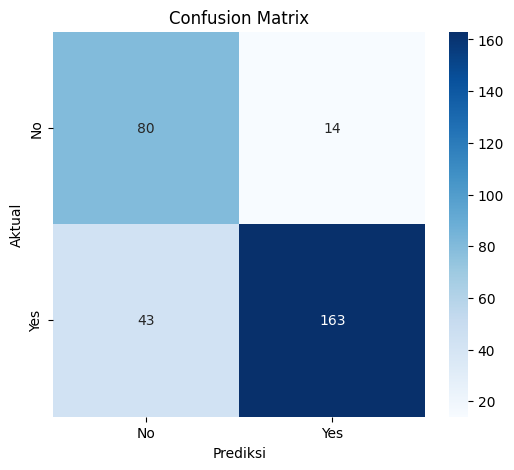

In [23]:
# %% 

# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

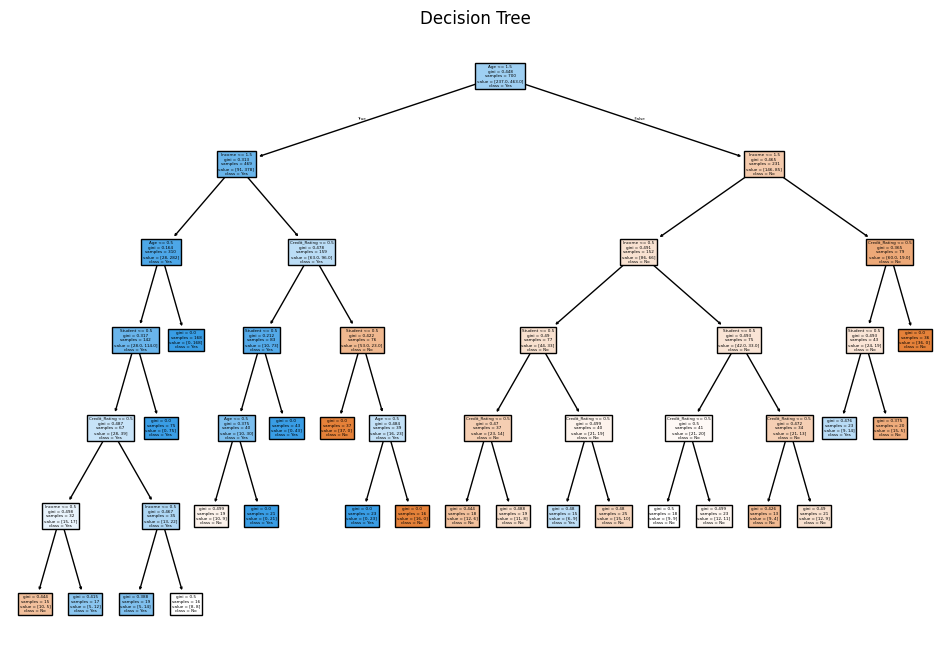

In [24]:
# %%

# Visualisasi pohon keputusan
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=x.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree")
plt.show()